<a href="https://colab.research.google.com/gist/yousabg/6ad2ba1d3ed89f605242a431940ce499/aquaticproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('https://media.githubusercontent.com/media/yousabg/indiginoussaquaticstuff/main/0196411-230224095556074.csv', on_bad_lines='skip', delimiter = '\t')

In [ ]:
nans = df.isna().sum()
cols_to_keep = nans[nans < 250000].index
new_df = df[cols_to_keep]

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from shapely.geometry import Point
import geopandas as geopandas
from geopandas import GeoDataFrame

In [ ]:
geo_usa = geopandas.read_file('/content/cb_2022_us_state_20m')


In [ ]:
!pip install mapclassify


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


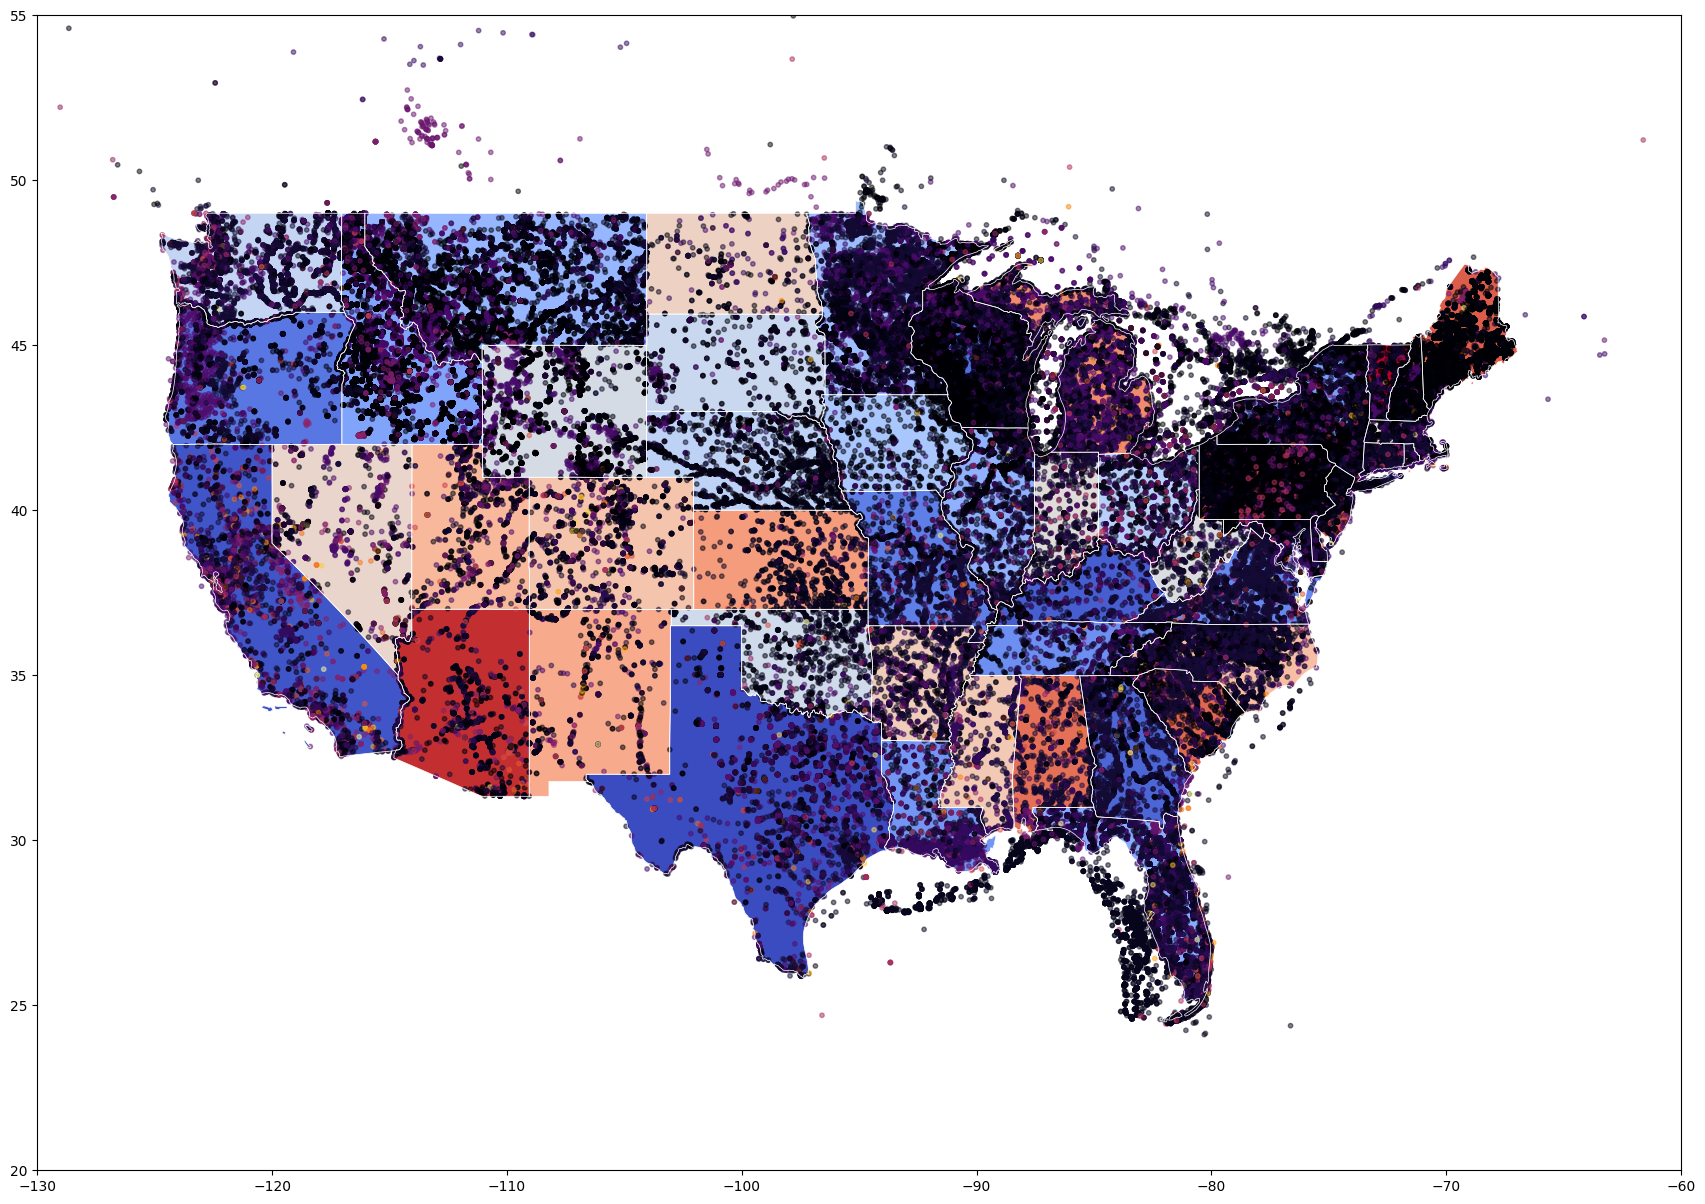

In [ ]:
import mapclassify
import matplotlib.pyplot as plt

colors = plt.get_cmap('inferno', len(df['species'].unique()))
species_color = {species: colors(i) for i, species in enumerate(df['species'].unique())}
df['color'] = df['species'].map(species_color)

geo_usa.plot(scheme="quantiles", figsize=(25, 15), legend=True, cmap='coolwarm')
plt.xlim(-130,-60)
plt.ylim(20,55)

plt.scatter(df['decimalLongitude'], df['decimalLatitude'], c=df['color'], s=10, alpha=0.5)
geo_usa.boundary.plot(color=None, edgecolor='white', linewidth=0.5, ax=plt.gca())

plt.show()

<ipython-input-15-45cb88ddeae9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoThousandDf['color'] = twoThousandDf['species'].map(species_color)


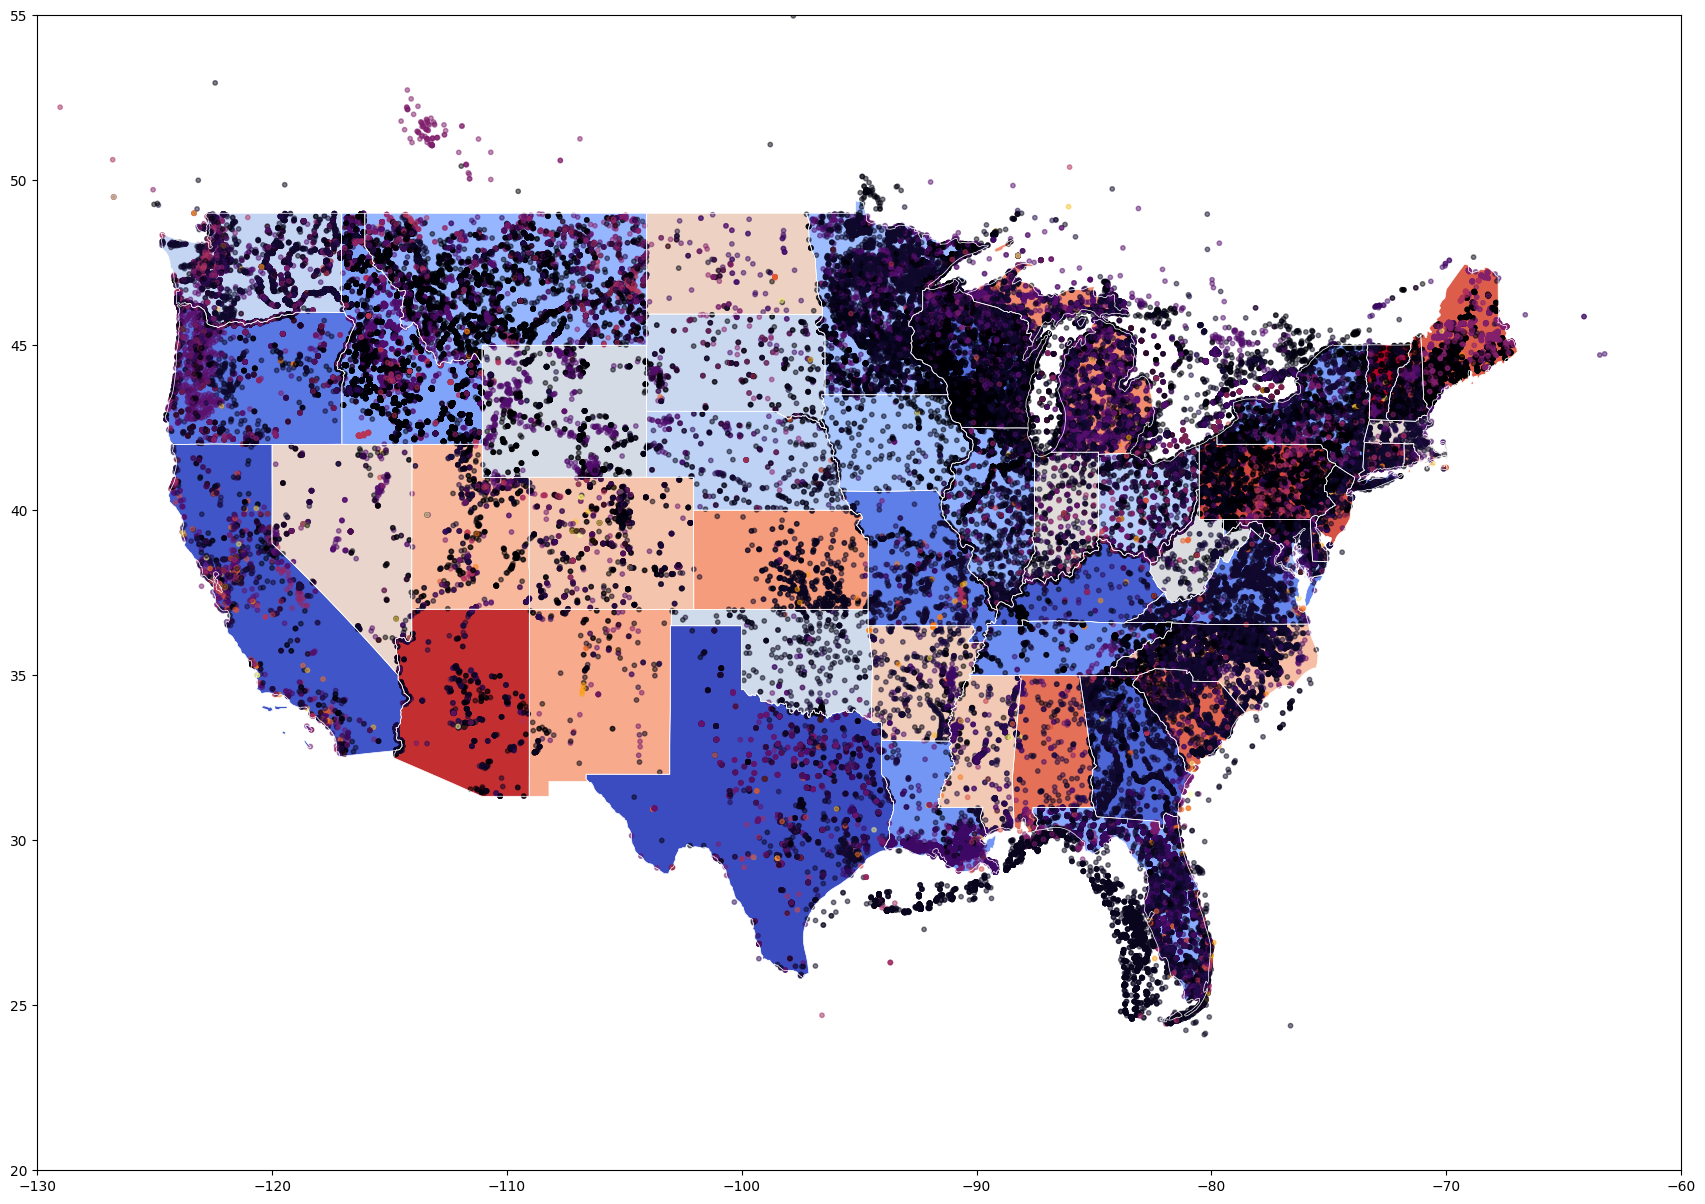

In [ ]:
twoThousandDf = df[df['year'] >= 2000]

colors = plt.get_cmap('inferno', len(twoThousandDf['species'].unique()))
species_color = {species: colors(i) for i, species in enumerate(twoThousandDf['species'].unique())}
twoThousandDf['color'] = twoThousandDf['species'].map(species_color)


geo_usa.plot(scheme="quantiles", figsize=(25, 15), legend=True, cmap='coolwarm')

plt.xlim(-130,-60)
plt.ylim(20,55)

plt.scatter(twoThousandDf['decimalLongitude'], twoThousandDf['decimalLatitude'], c=twoThousandDf['color'], s=10, alpha=0.5)
geo_usa.boundary.plot(color=None, edgecolor='white', linewidth=0.5, ax=plt.gca())

plt.show()

In [ ]:
def get_color(species):
    return species_to_color[species]

Mounted at /content/drive


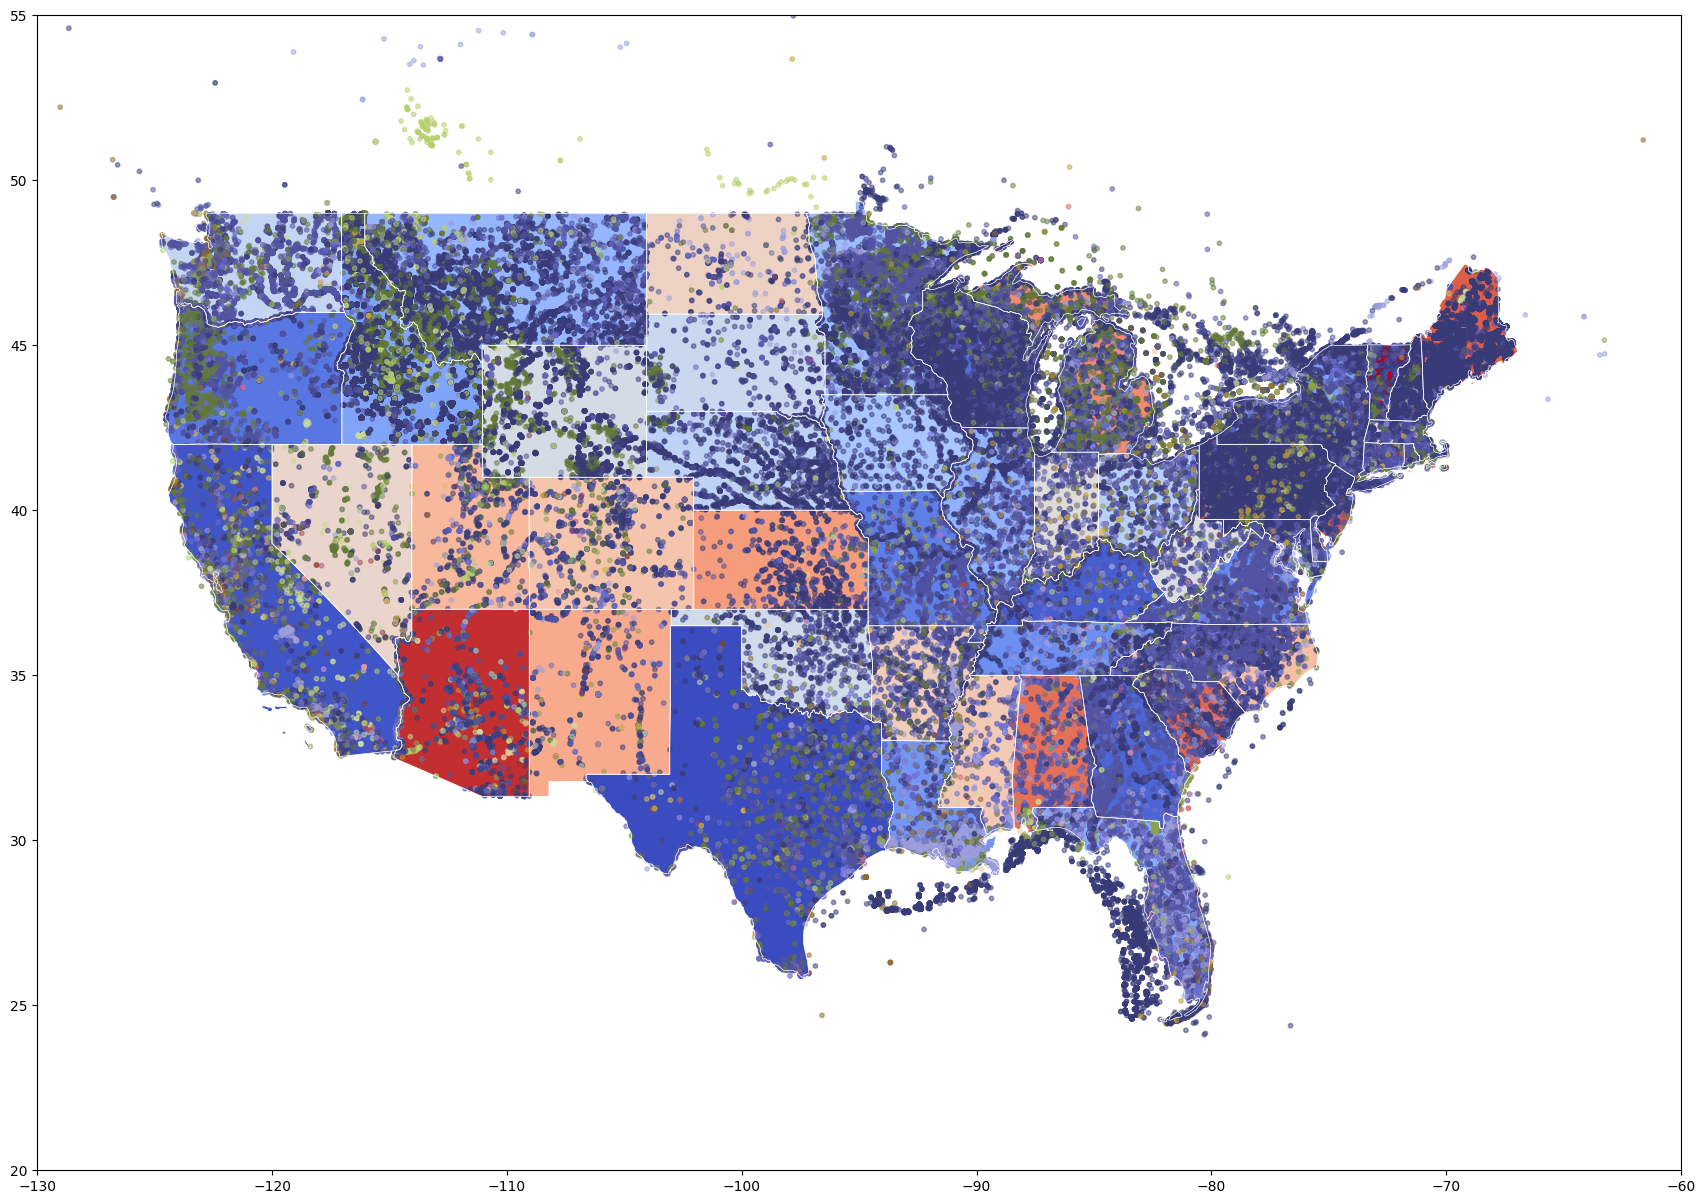

In [ ]:
import numpy as np

from google.colab import drive

drive.mount('/content/drive')
years = list(range(1765, 2024))

species_list = df['species'].unique()
color_list = plt.cm.tab20b(np.linspace(0, 1, len(species_list)), alpha=0.8)
species_to_color = {}
for i, species in enumerate(species_list):
    species_to_color[species] = color_list[i]

geo_usa.plot(scheme="quantiles", figsize=(25, 15), legend=True, cmap='coolwarm')
plt.xlim(-130,-60)
plt.ylim(20,55)
df['color'] = df['species'].apply(get_color)
plt.scatter(df['decimalLongitude'], df['decimalLatitude'], c=df['color'], s=10, alpha=0.5)
geo_usa.boundary.plot(color=None, edgecolor='white', linewidth=0.5, ax=plt.gca())

plt.show()

In [ ]:
test = df[df['year'] == 2023]
len(test)

15

In [ ]:
def doGraphs(year, temp_df):
  if (len(temp_df) >= 200 or year >= 1900):
    geo_usa.plot(scheme="quantiles", figsize=(25, 15), legend=True, cmap='coolwarm')
    plt.xlim(-130,-60)
    plt.ylim(20,55)
    plt.title("Year " + str(year))
    temp_df['color'] = temp_df['species'].apply(get_color)
    plt.scatter(temp_df['decimalLongitude'], temp_df['decimalLatitude'], c=temp_df['color'], s=10, alpha=0.5)
    geo_usa.boundary.plot(color=None, edgecolor='white', linewidth=0.5, ax=plt.gca())

    plt.savefig('/content/drive/MyDrive/species_stuff/species_change_year{}.png'.format(year))

<ipython-input-19-961e31ee9c4e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['color'] = temp_df['species'].apply(get_color)
<ipython-input-19-961e31ee9c4e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['color'] = temp_df['species'].apply(get_color)
<ipython-input-19-961e31ee9c4e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

KeyboardInterrupt: ignored

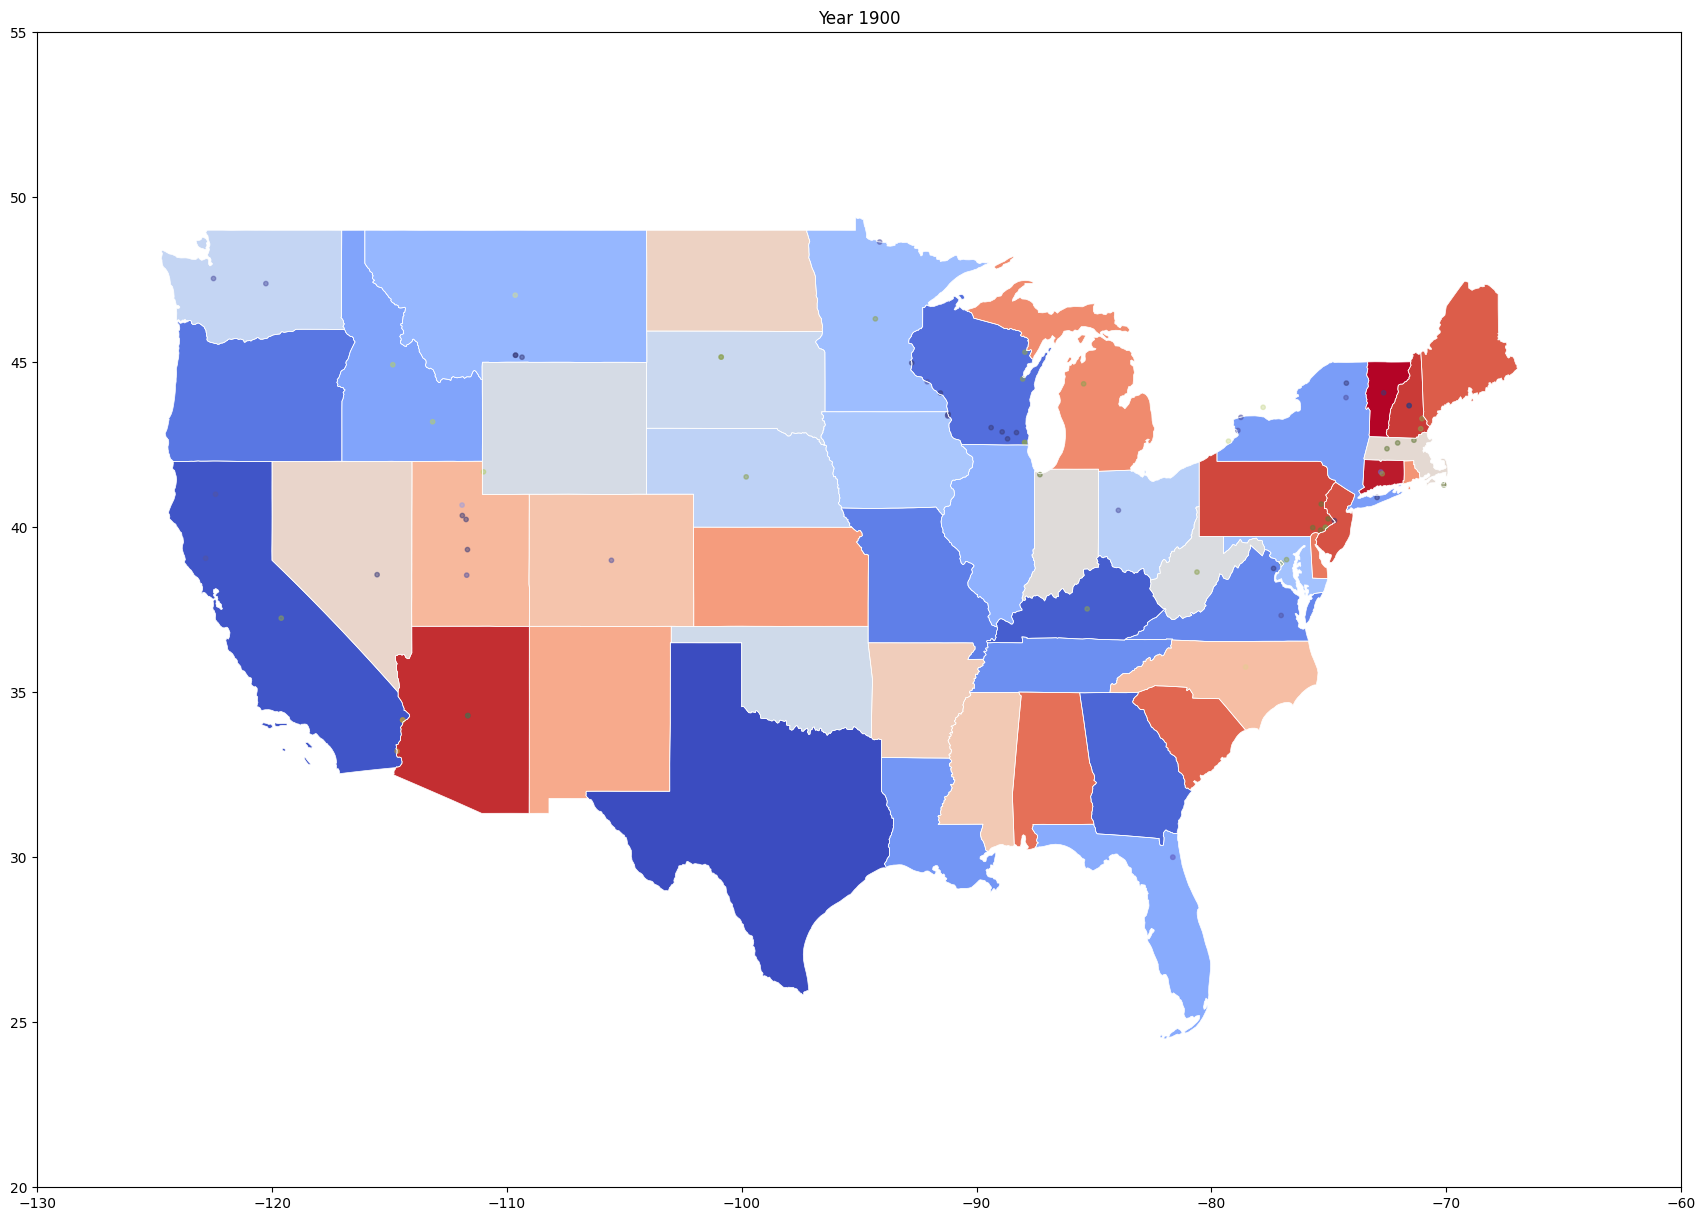

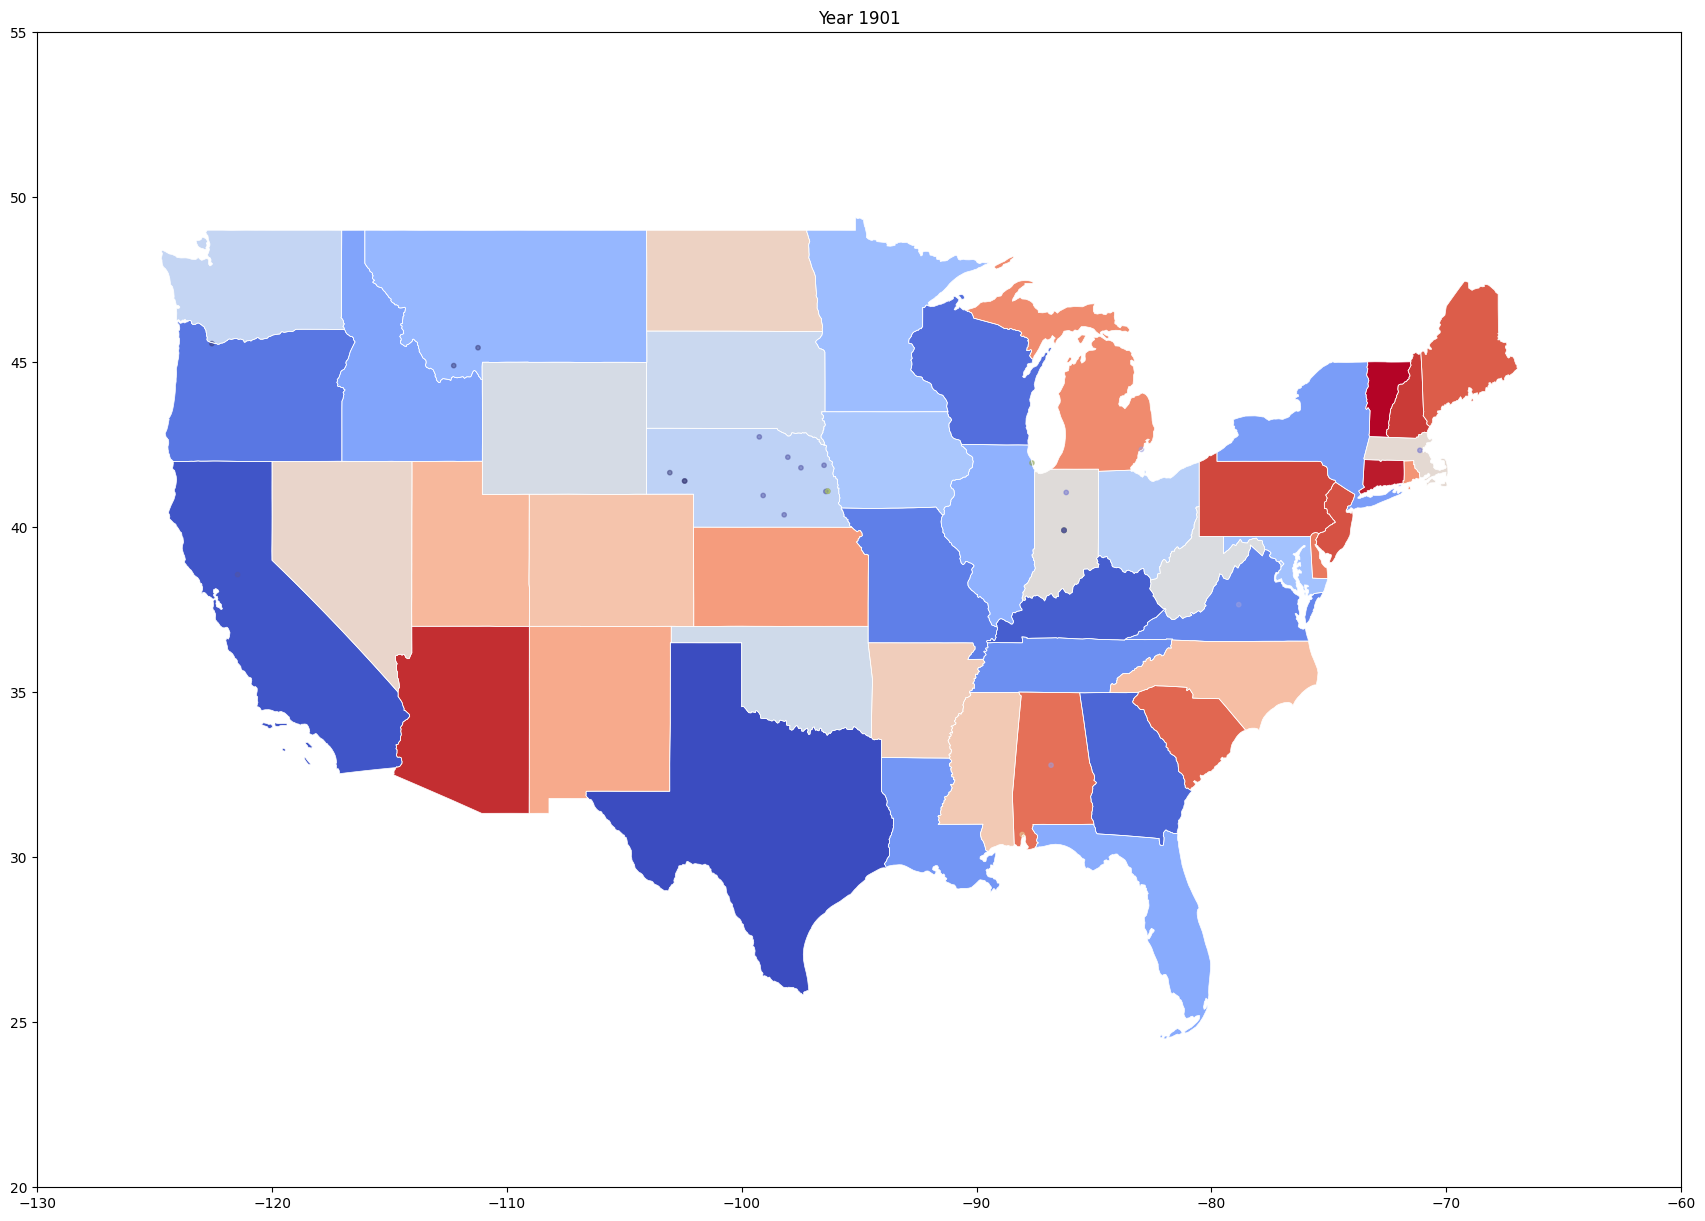

Error in callback <function flush_figures at 0x7f45d7595000> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
years = list(range(1765, 2024))

for year in years:
  temp_df = df[df['year'] == year]
  doGraphs(year, temp_df)